## DICTIONARY

<b>ID:</b> ID Number of Customers. <br><br>
<b>Warehouse block:</b> The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
<br><br>
<b>Mode of shipment:</b> The Company Ships the products in multiple way such as Ship, Flight and Road.<br><br>
<b>Customer care calls:</b> The number of calls made from enquiry for enquiry of the shipment.<br><br>
<b>Customer rating:</b> The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br><br>
<b>Cost of the product:</b> Cost of the Product in US Dollars.<br><br>
<b>Prior purchases:</b> The Number of Prior Purchase.<br><br>
<b>Product importance:</b> The company has categorized the product in the various parameter such as low, medium, high.<br><br>
<b>Gender:</b> Male and Female.<br><br>
<b>Discount offered:</b> Discount offered on that specific product.<br><br>
<b>Weight in gms:</b> It is the weight in grams.<br><br>
<b>Reached on time:</b> 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.<br><br>

# Imports

In [1]:
import pandas as pd
import numpy as np
import inflection

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing 

from IPython.display import Image



## 0.1 - Loading data

In [2]:
df = pd.read_csv("../data/data.csv")

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# 1.0 - DATA DESCRIPTION

## 1.0.1 - Renaming columns

In [4]:
df1 = df.copy()

In [5]:
df1.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
columns_old = df.columns

In [7]:
#Converting the columns names to snake_case 
rename_columns = lambda x: inflection.underscore(x)
columns_new = list(map(rename_columns, columns_old))

#Renaming
df1.columns = columns_new

## 1.0.2 - Data Dimension

In [8]:
print( 'The dataframe has {} lines and {} columns'.format(df1.shape[0], df1.shape[1]) )

The dataframe has 10999 lines and 12 columns


## 1.0.3 - Data Types

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  reached.on.time_y.n  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
# Converting Dtypes 
df1['cost_of_the_product'] = df1['cost_of_the_product'].astype(float)
df1['reached.on.time_y.n'] = df1['reached.on.time_y.n'].astype(str)

# And checking again
df1.dtypes

id                       int64
warehouse_block         object
mode_of_shipment        object
customer_care_calls      int64
customer_rating          int64
cost_of_the_product    float64
prior_purchases          int64
product_importance      object
gender                  object
discount_offered         int64
weight_in_gms            int64
reached.on.time_y.n     object
dtype: object

## 1.0.4 - Checking N/A

In [11]:
df1.isna().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached.on.time_y.n    0
dtype: int64

## 1.1 - Descriptive statistics

In [12]:
numerical_list = ['int64', 'float64', 'int32']

#Separating numerical and categorical att
numerical_attributes = df1.select_dtypes(include = numerical_list)
categorical_attributes = df1.select_dtypes(exclude = numerical_list)

### 1.1.1 - Central tendency and dispersion metrics

In [13]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0


### 1.1.2 - Verifying outliers

In [14]:
numerical_attributes.columns

Index(['id', 'customer_care_calls', 'customer_rating', 'cost_of_the_product',
       'prior_purchases', 'discount_offered', 'weight_in_gms'],
      dtype='object')

<AxesSubplot:title={'center':'weight_in_gms'}>

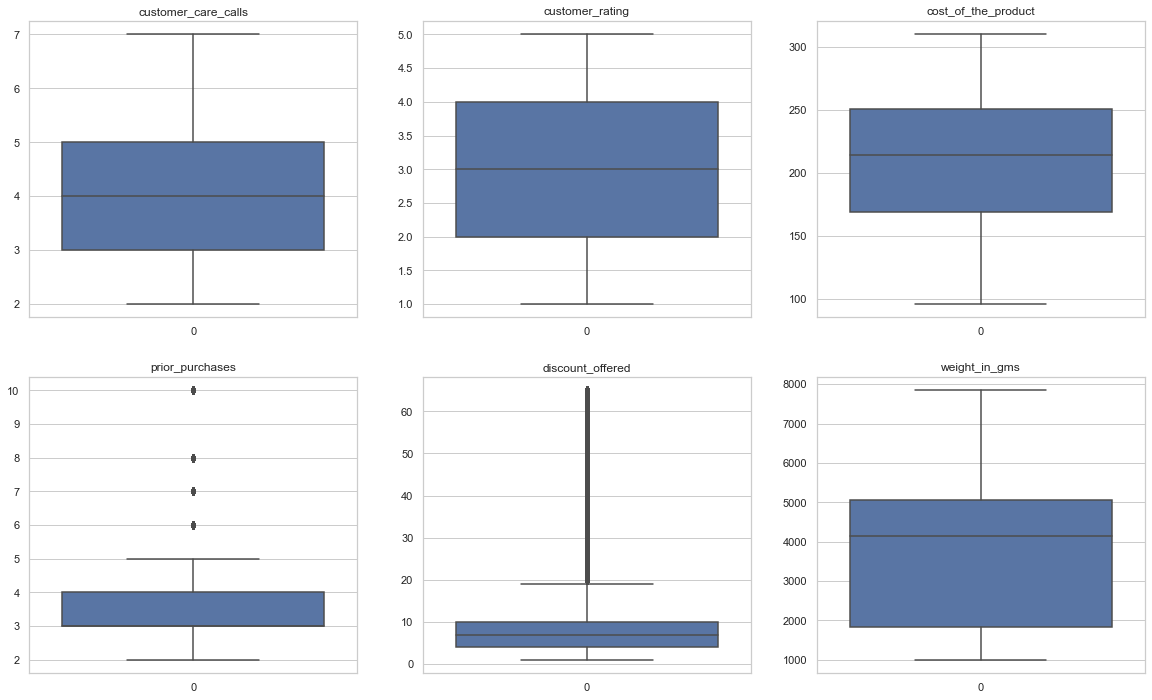

In [15]:
#Ploting the boxplot to verify if we've outliers
plt.figure(figsize=(20,12))
sns.set_theme(style="whitegrid")

plt.subplot(2,3,1)
plt.title('customer_care_calls')
sns.boxplot(data = numerical_attributes['customer_care_calls'])

plt.subplot(2,3,2)
plt.title('customer_rating')
sns.boxplot(data = numerical_attributes['customer_rating'])

plt.subplot(2,3,3)
plt.title('cost_of_the_product')
sns.boxplot(data = numerical_attributes['cost_of_the_product'])

plt.subplot(2,3,4)
plt.title('prior_purchases')
sns.boxplot(data = numerical_attributes['prior_purchases'])

plt.subplot(2,3,5)
plt.title('discount_offered')
sns.boxplot(data = numerical_attributes['discount_offered'])

plt.subplot(2,3,6)
plt.title('weight_in_gms')
sns.boxplot(data = numerical_attributes['weight_in_gms'])

In [16]:
#Outliers or not?

#prior_purchases
prior_purchases = pd.DataFrame( df1['prior_purchases'].describe() ).reset_index()

#discount_offered 
discount = pd.DataFrame ( df1['discount_offered'].describe() ).reset_index()

pd.merge(prior_purchases, discount)

#CONCLUSION -- After analyzing both attributes, we can conclude that they aren't outliers, so, we don't need to remove they.


,index,prior_purchases,discount_offered
0,count,10999.000000,10999.000000
1,mean,3.567597,13.373216
2,std,1.522860,16.205527
3,min,2.000000,1.000000
4,25%,3.000000,4.000000
5,50%,3.000000,7.000000
6,75%,4.000000,10.000000
7,max,10.000000,65.000000


### 1.1.3 - Categorical attributes 

In [17]:
categorical_attributes.columns

Index(['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender',
       'reached.on.time_y.n'],
      dtype='object')

In [18]:
#warehouse_block
warehouse_block = categorical_attributes['warehouse_block'].value_counts(normalize = True).reset_index()
warehouse_block.columns = ['warehouse_block', 'values']

#mode_of_shipment
shipment = categorical_attributes['mode_of_shipment'].value_counts(normalize = True).reset_index()
shipment.columns = ['shipment', 'values']

#product_importance
product_importance = categorical_attributes['product_importance'].value_counts(normalize = True).reset_index()
product_importance.columns = ['product_importance', 'values']

#gender
gender = categorical_attributes['gender'].value_counts(normalize = True).reset_index()
gender.columns = ['gender', 'values']


<AxesSubplot:xlabel='gender', ylabel='values'>

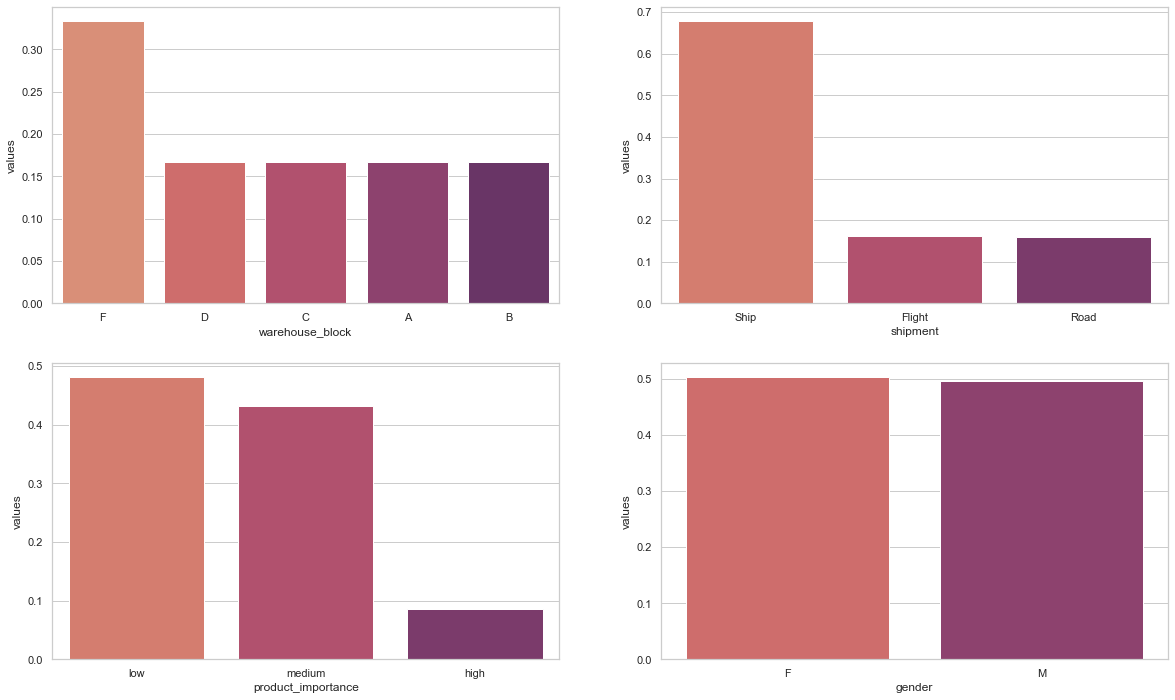

In [19]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.barplot(x = 'warehouse_block', y = 'values', data = warehouse_block, palette = 'flare')


plt.subplot(2,2,2)
sns.barplot(x = 'shipment', y = 'values', data = shipment, palette = 'flare')

plt.subplot(2,2,3)
sns.barplot(x = 'product_importance', y = 'values', data = product_importance, palette = 'flare')


plt.subplot(2,2,4)
sns.barplot(x = 'gender', y = 'values', data = gender, palette = 'flare')

# 2.0 - FEATURE ENGINEERING

In [20]:
df2 = df1.copy()

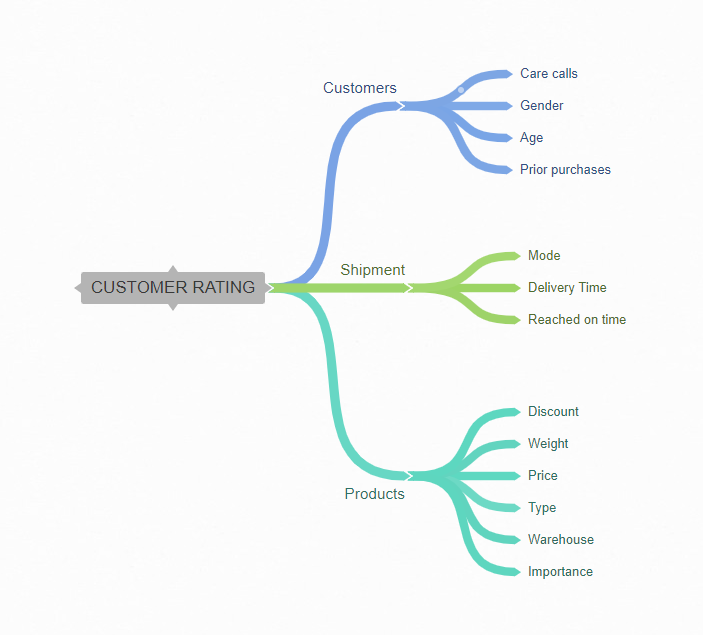

In [21]:
Image('../Images/mindmap.png')

## 2.1 - Hypothesis creation

### 2.1.1 - Products

**1.** Products with biggest discount have a highest customer rating

**2.** Products with biggest weight have a highest customer rating

**3.** Products with biggest price have a highest customer rating

**4.** Produts from warehouse A have a highest customer rating

**5.** Products with low importance have a lowest customer rating

### 2.1.2 - Shipment

**1.** Products shipped from airplane have a highest customer rating 

**2.** Products with delivery delay have a lowest customer rating

**3.** Products reached on time have a highest customer rating

### 2.1.3 - Customer

**1.** Customers who call should give a lowest customer rating

**2.** Male customers should give a highest customer rating

**3.** Customers with prior purchases should give a highest customer rating

## 2.2 - Feature engineering

In [22]:
le = preprocessing.LabelEncoder()
oe = preprocessing.OrdinalEncoder()

# Encoding

#mode_of_shipment (with label encoder)
df2['shipment_enconded'] = le.fit_transform(df2['mode_of_shipment'])

#product_importance (with ordinal encoder)
df2['product_importance_encoded'] = oe.fit_transform(df2[['product_importance']])

#gender (label encoder with lambda)
df2['gender_encoded'] = df2['gender'].apply( lambda x: 0 if x == 'F' else 1 )

#warehouse_block (with label encoder)
map = {'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'F' : 4}
df2['warehouse_block_encoded'] = df2.warehouse_block.map(map) 

In [23]:
df2.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n,shipment_enconded,product_importance_encoded,gender_encoded,warehouse_block_encoded
0,1,D,Flight,4,2,177.0,3,low,F,44,1233,1,0,1.0,0,3
1,2,F,Flight,4,5,216.0,2,low,M,59,3088,1,0,1.0,1,4
2,3,A,Flight,2,2,183.0,4,low,M,48,3374,1,0,1.0,1,0
3,4,B,Flight,3,3,176.0,4,medium,M,10,1177,1,0,2.0,1,1
4,5,C,Flight,2,2,184.0,3,medium,F,46,2484,1,0,2.0,0,2


# 3.0 - EXPLORATORY DATA ANALYSIS

In [24]:
df3 = df2.copy()

## 3.1 - Univariated analysis

### 3.1.1 - Response variable

In [47]:
(df3['customer_rating'].value_counts(normalize = True, ascending = False) * 100).round(2)

3    20.36
1    20.32
4    19.90
5    19.74
2    19.68
Name: customer_rating, dtype: float64

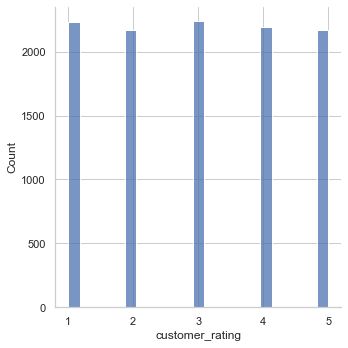

In [25]:
sns.displot(df3['customer_rating'])

### 3.1.2 - Numerical variables

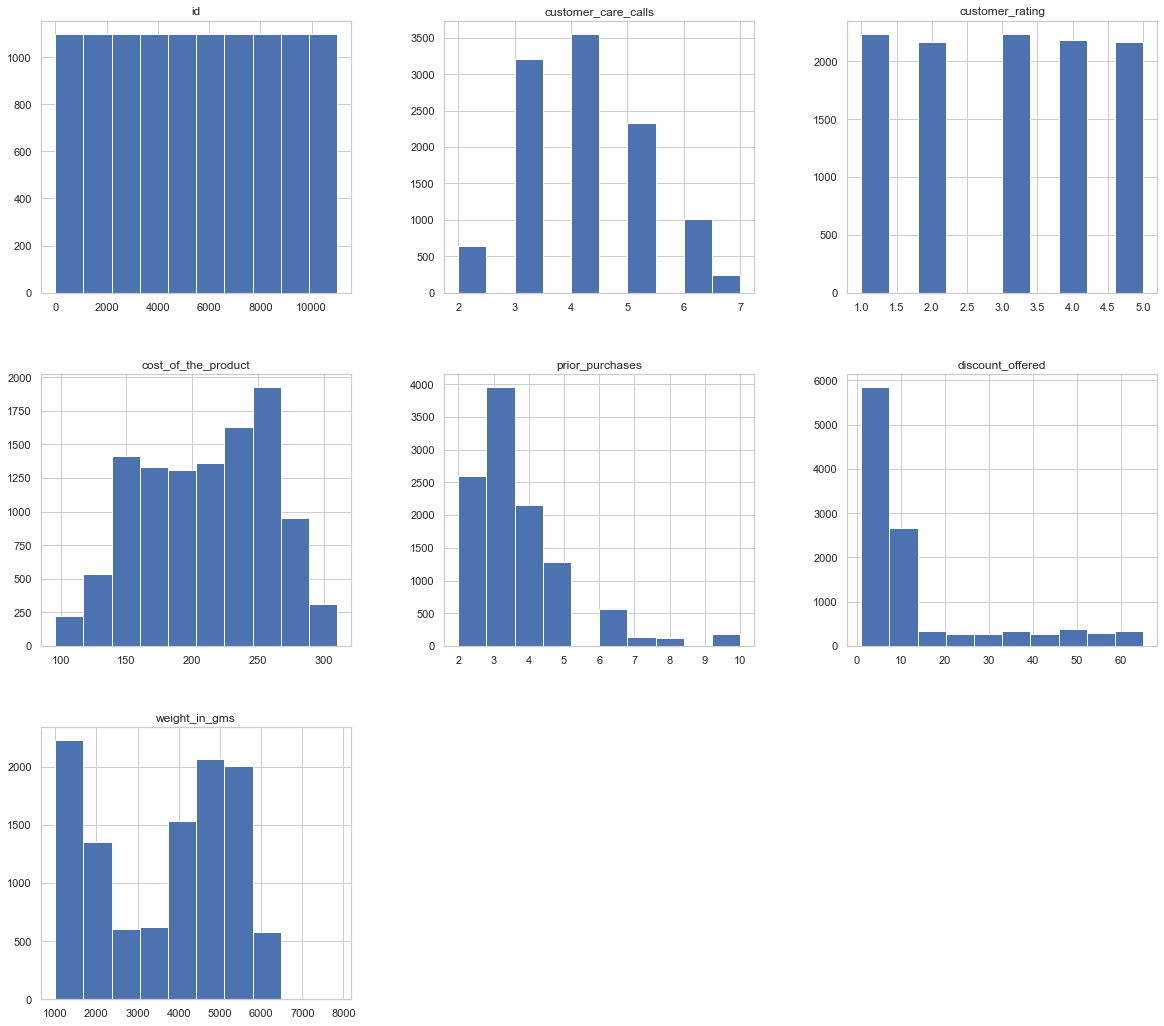

In [26]:
numerical_attributes.hist(figsize=(20, 18));


### 3.1.3 - Categorical variables

C:\Users\lvasq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lvasq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lvasq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lvasq\anaconda3\lib\si

<AxesSubplot:xlabel='gender', ylabel='count'>

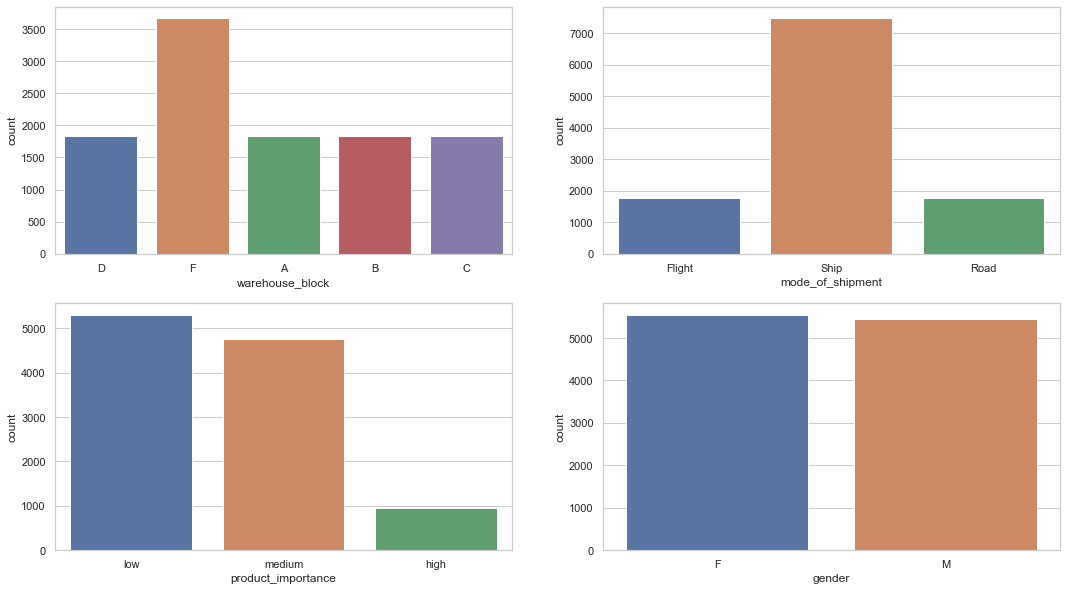

In [131]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.countplot(df3['warehouse_block'])

plt.subplot(2,2,2)
sns.countplot(df3['mode_of_shipment'])

plt.subplot(2,2,3)
sns.countplot(df3['product_importance'])

plt.subplot(2,2,4)
sns.countplot(df3['gender'])

## 3.2 - Bivariated analysis

### H1. Products with biggest discount have a highest customer rating
**False**


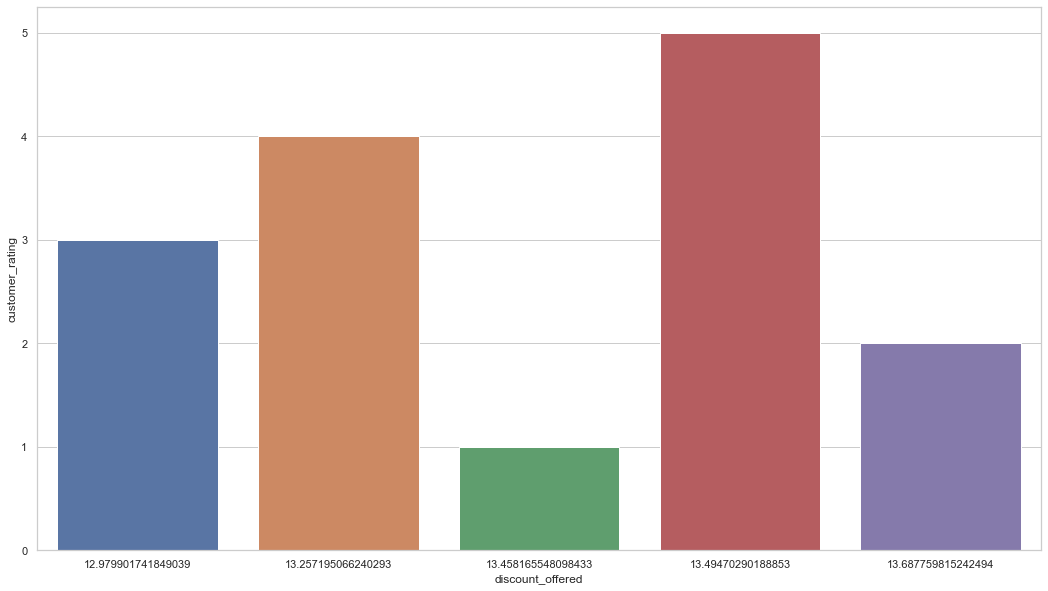

In [28]:
plt.figure(figsize=(18,10))
h = df3[['discount_offered','customer_rating']].groupby('customer_rating').mean().reset_index()
sns.barplot(x = 'discount_offered', y = 'customer_rating', data = h);

### H2. Products with biggest weight have a highest customer rating
**False**


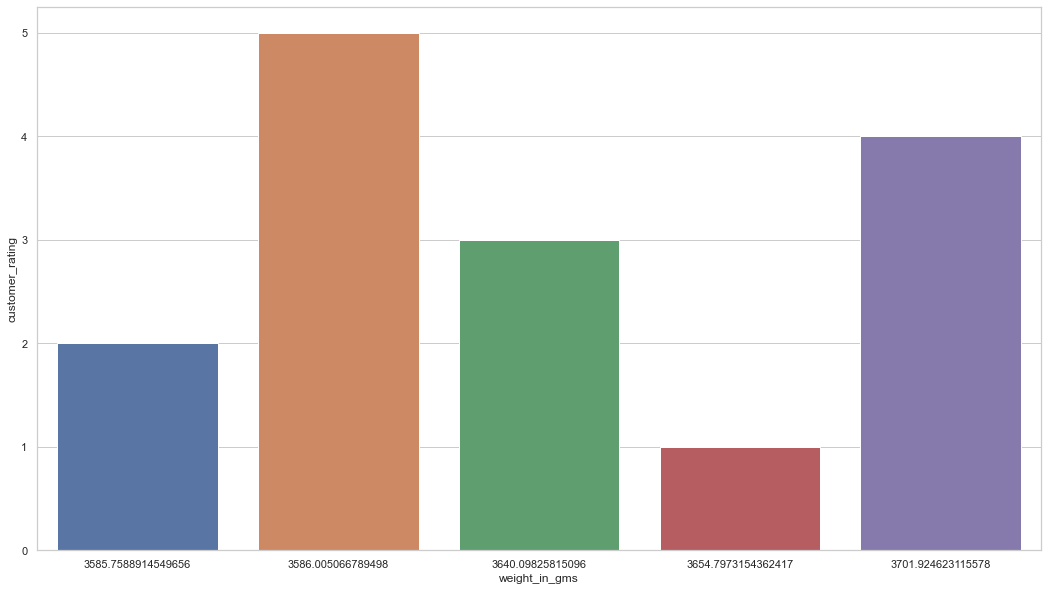

In [29]:
plt.figure(figsize=(18,10))
h = df3[['weight_in_gms', 'customer_rating']].groupby('customer_rating').mean().reset_index()
sns.barplot(x = 'weight_in_gms', y = 'customer_rating', data = h);

### H3. Products with biggest price have a highest customer rating
**True**

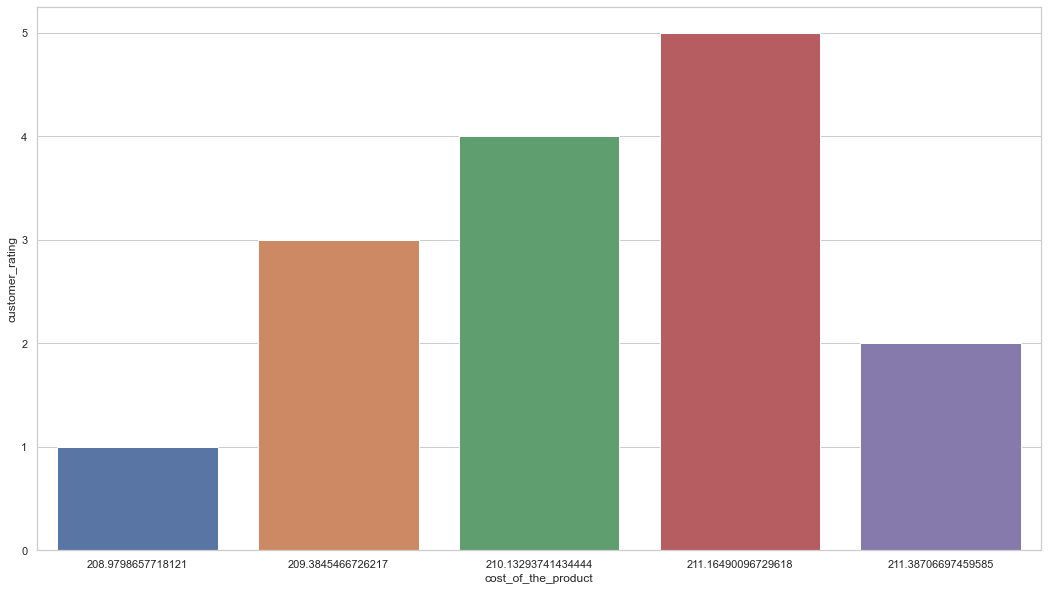

In [125]:
h = df3[['cost_of_the_product', 'customer_rating']].groupby('customer_rating').mean().reset_index()
plt.figure(figsize=(18,10))
sns.barplot(x = 'cost_of_the_product', y = 'customer_rating', data = h);

### H4. Produts from warehouse A have a highest customer rating
**False**

In [123]:
pd.crosstab(df3['warehouse_block'], df3['customer_rating'])

customer_rating,1,2,3,4,5
warehouse_block,,,,,
A,394,376,345,350,368
B,371,376,371,348,367
C,364,362,383,369,355
D,364,340,390,379,361
F,742,711,750,743,720


### H5 - Products with low importance have a lowest customer rating
**True**

In [120]:
pd.crosstab(df3['product_importance'], df3['customer_rating'])

customer_rating,1,2,3,4,5
product_importance,,,,,
high,186,199,184,193,186
low,1117,1015,1054,1060,1051
medium,932,951,1001,936,934


### H6. Products shipped from airplane have a highest customer rating 
**False**

In [121]:
plt.figure(figsize=(18,10))
pd.crosstab(df3['mode_of_shipment'], df3['customer_rating'])

customer_rating,1,2,3,4,5
mode_of_shipment,,,,,
Flight,369,362,330,363,353
Road,361,347,343,357,352
Ship,1505,1456,1566,1469,1466


<Figure size 1296x720 with 0 Axes>

### H7. Products with delivery delay have a lowest customer rating
**True**

In [130]:
# 1 = delayed and 0 = reached on time.
pd.crosstab(df3['reached.on.time_y.n'], df3['customer_rating'])

customer_rating,1,2,3,4,5
reached.on.time_y.n,,,,,
0,922,892,882,886,854
1,1313,1273,1357,1303,1317


In [136]:
pd.crosstab(df3['customer_care_calls'], df3['customer_rating'])

customer_rating,1,2,3,4,5
customer_care_calls,,,,,
2,130,124,125,123,136
3,683,623,656,650,605
4,691,717,744,718,687
5,491,471,446,450,470
6,187,184,214,213,215
7,53,46,54,35,58


### H8. Male customers should give a highest customer rating
**False**

In [138]:
pd.crosstab(df3['gender'], df3['customer_rating'])

customer_rating,1,2,3,4,5
gender,,,,,
F,1149,1062,1143,1096,1095
M,1086,1103,1096,1093,1076


### H9. Customers with more prior purchases should give a highest customer rating
**True**

<AxesSubplot:xlabel='prior_purchases', ylabel='customer_rating'>

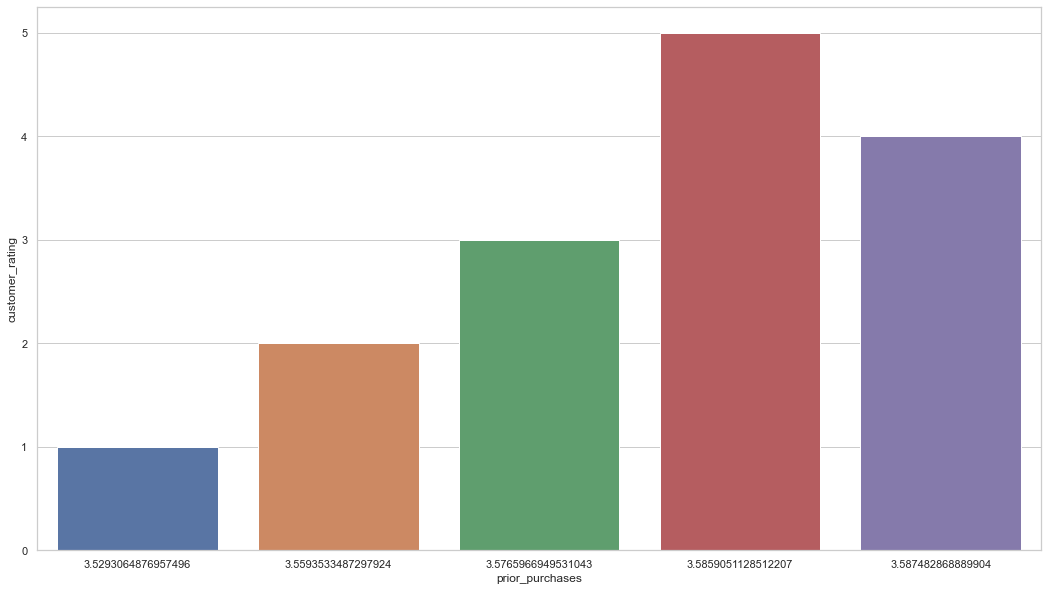

In [145]:
h = df3[['prior_purchases', 'customer_rating']].groupby('customer_rating').mean().reset_index()
plt.figure(figsize=(18,10))
sns.barplot(x = 'prior_purchases', y = 'customer_rating', data = h)